In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import tqdm
import os

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib
import pathlib

In [2]:
model = keras.models.load_model("model_training/faces_model_improved.h5")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 187, 250, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 187, 250, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 187, 250, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 93, 125, 32)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 93, 125, 32)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 372000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)               

In [3]:
model.save('faces_model_2.h5', include_optimizer=True)

This image most likely belongs to medium with a 97.36 percent confidence.


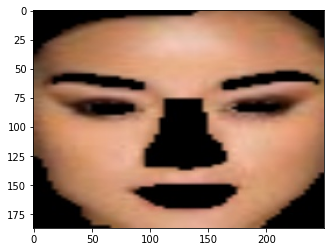

In [7]:
img_height = 187
img_width = 250
class_names = ['dark', 'light', 'medium', 'veryDark', 'veryLight']
#path to the image you want to test the skin color detection with
imgagePath = r"test_data/facesTestImagesProcessed/image-3.jpg"
img = keras.preprocessing.image.load_img(
    imgagePath, target_size=(img_height, img_width)
)
plt.imshow(img)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)